In [1]:
#importing necessary libraries
#Data Manipulation
from google.colab import drive

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Model Development and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import (KMeans, AgglomerativeClustering)

# Loading dataset

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/lending_data.csv")
data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
data.shape #No of samples and No of Features

(77536, 8)

In [4]:
data.dtypes #Datatype of each column

,0
loan_size,float64
interest_rate,float64
borrower_income,int64
debt_to_income,float64
num_of_accounts,int64
derogatory_marks,int64
total_debt,int64
loan_status,int64


In [5]:
print("\nTarget Variable Distribution:")
print(data['loan_status'].value_counts())


Target Variable Distribution:
loan_status
0    75036
1     2500
Name: count, dtype: int64


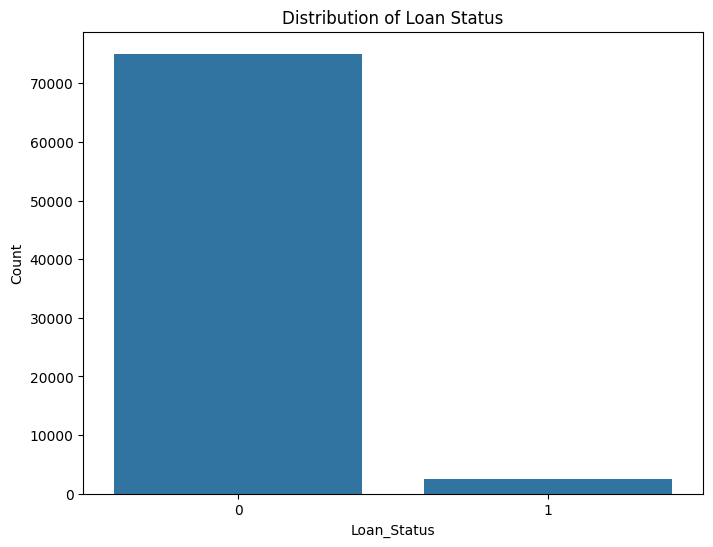

In [6]:
class_counts = data['loan_status'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

In [7]:
data.describe() #summary statistics

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


# Handling Missing values

In [8]:
missing_values = data.isnull().sum()

In [9]:
missing_values

,0
loan_size,0
interest_rate,0
borrower_income,0
debt_to_income,0
num_of_accounts,0
derogatory_marks,0
total_debt,0
loan_status,0


In [10]:

#data.drop_duplicates(inplace=True) #dropping duplicates

#num_duplicates = data.duplicated().sum() #check for duplicates in the above code
#print(num_duplicates)

# Outliers detection

In [11]:
features=[]
from scipy import stats
import seaborn as sns
for col in data.columns:
  features.append(col)
print(features)


['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status']


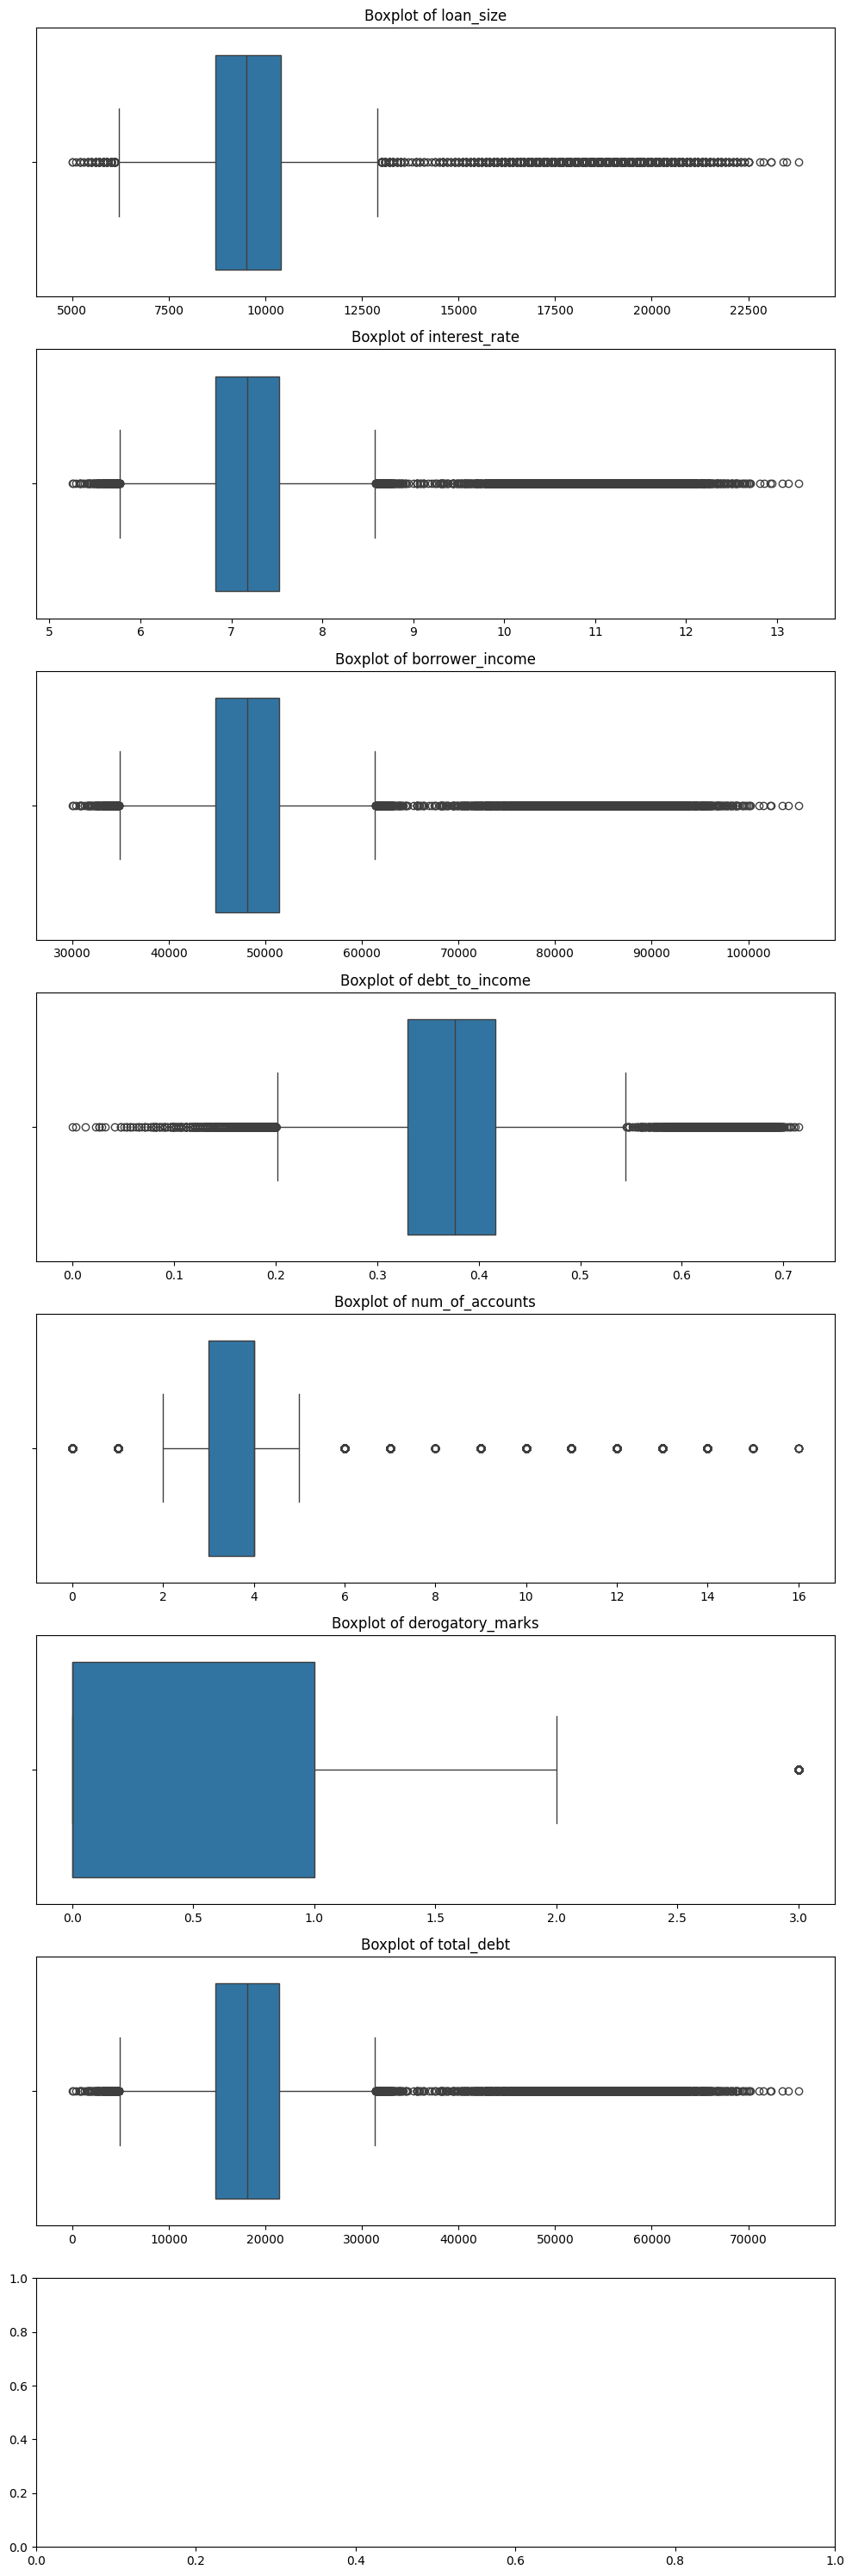

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

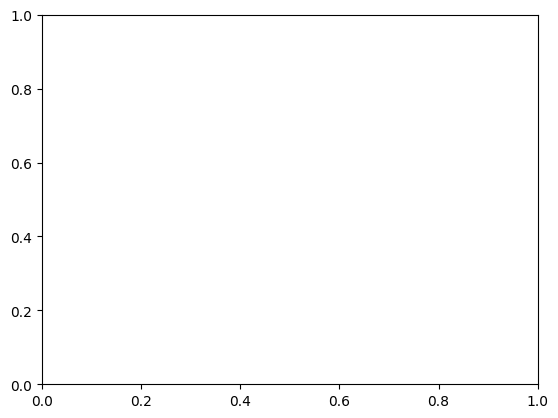

In [12]:
import matplotlib.pyplot as plt #Importing matplotlib for plotting
import seaborn as sns
fig, axes = plt.subplots(nrows=len(features), figsize=(10, 30)) #creating subplots with specified dimensions
for i, feature in enumerate(features):
  if feature!='loan_status':
    sns.boxplot(x=data[feature], ax=axes[i])     #Creating a boxplot for current feature
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel('')

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()
plt.xticks(rotation=0)

In [13]:
features.pop()

'loan_status'

# Handling Outliers

In [14]:
from scipy.stats.mstats import winsorize

# Define the percentage for Winsorization
winsorize_percentage = 0.07  # 5th and 95th percentiles

# Apply Winsorization to numerical features
data[features] = data[features].apply(lambda x: winsorize(x, limits=winsorize_percentage))


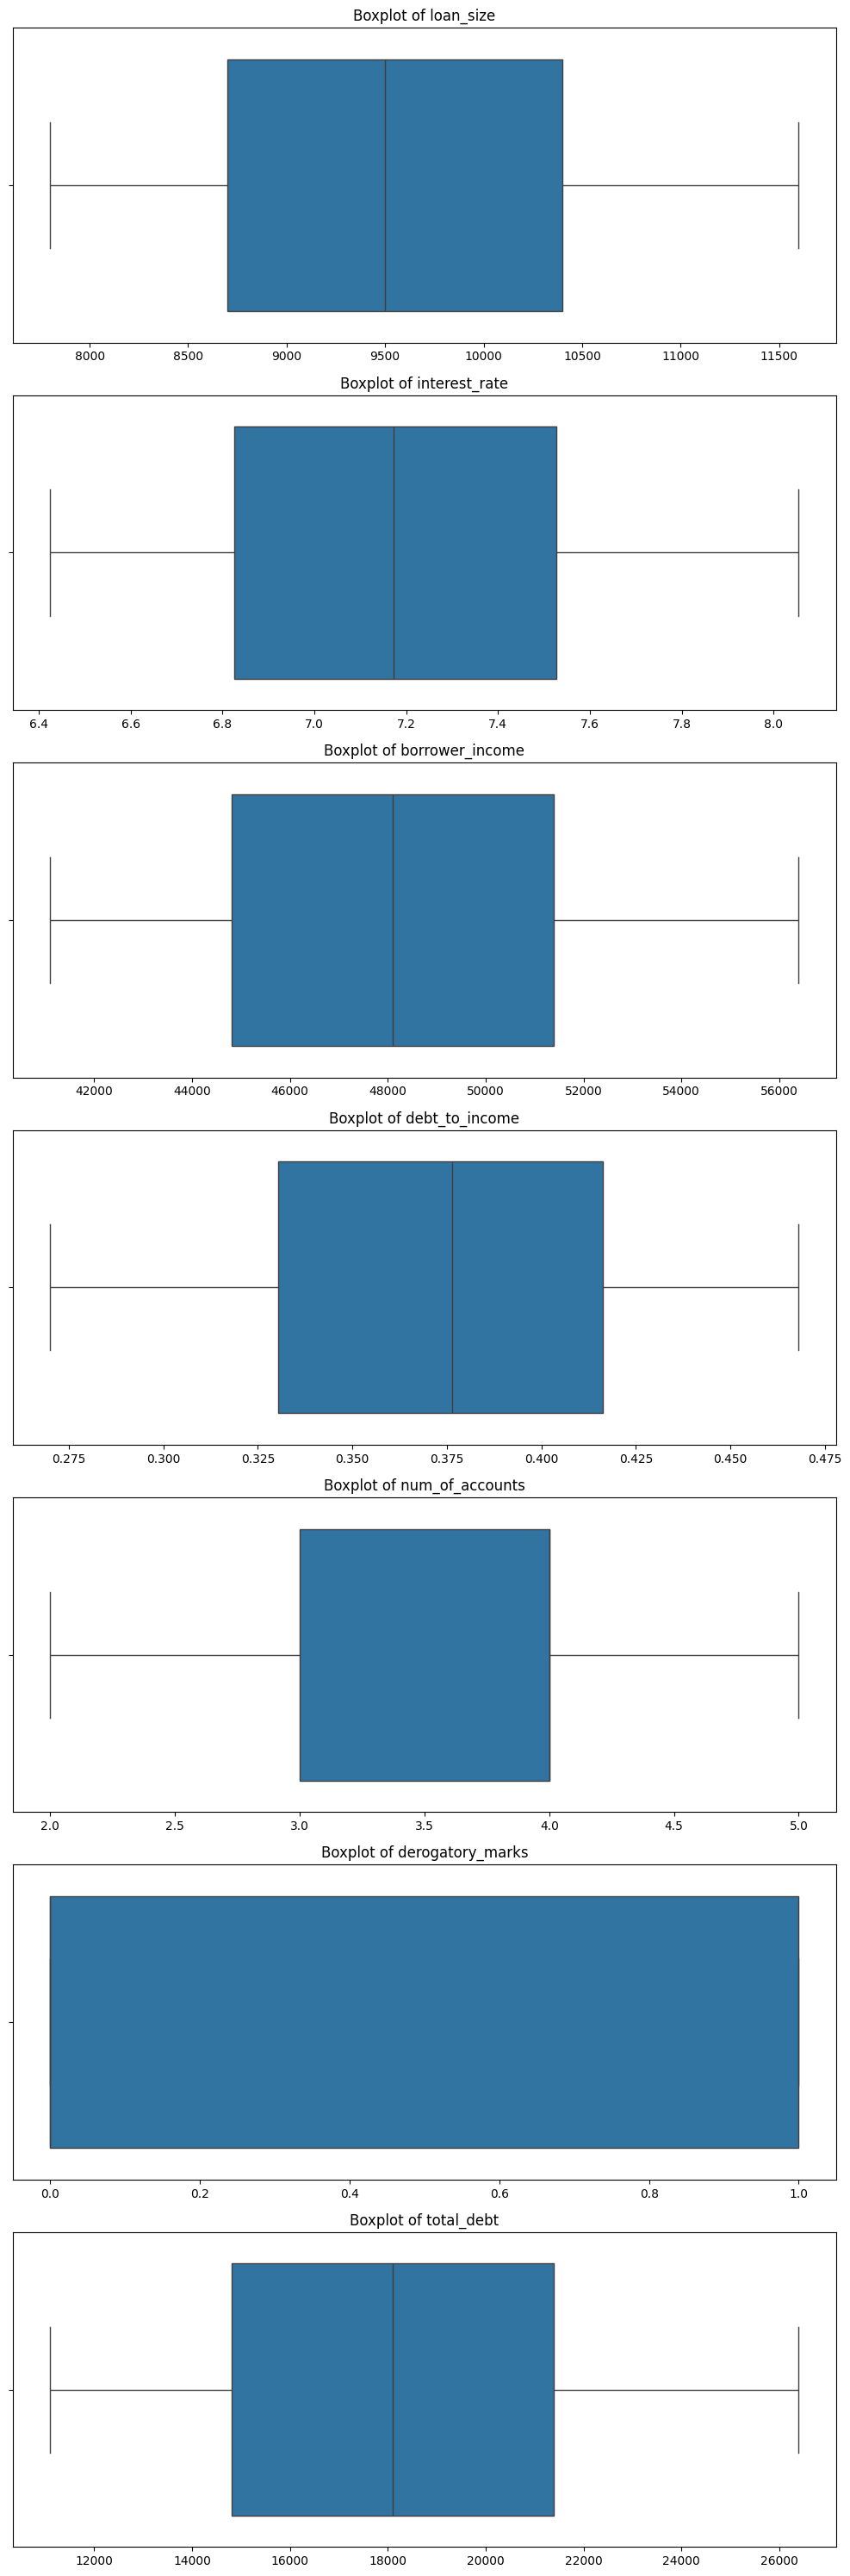

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

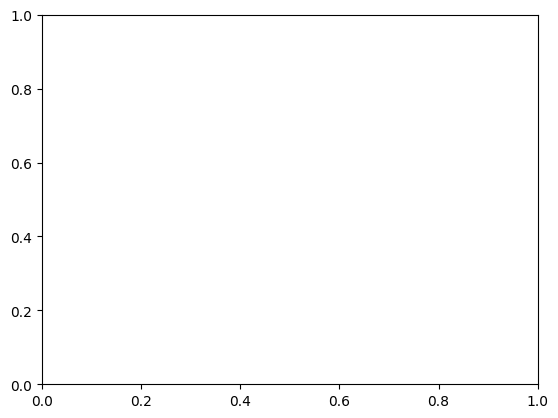

In [15]:
import matplotlib.pyplot as plt #Importing matplotlib for plotting
import seaborn as sns
fig, axes = plt.subplots(nrows=len(features), figsize=(10, 30)) #creating subplots with specified dimensions
for i, feature in enumerate(features):
  if feature!='loan_status':
    sns.boxplot(x=data[feature], ax=axes[i])     #Creating a boxplot for current feature
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel('')

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()
plt.xticks(rotation=0)

# Feature Engineering

In [16]:
data['credit_utilization_rate'] = data['total_debt'] / data['borrower_income']


# EDA -Exploratory Data Analysis

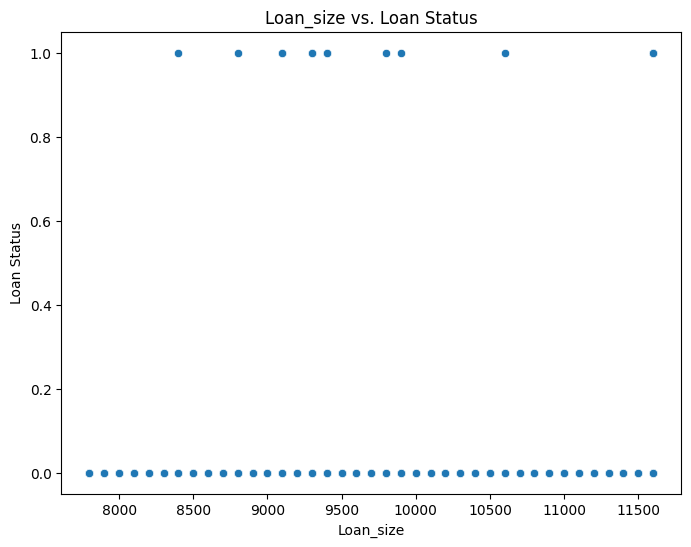

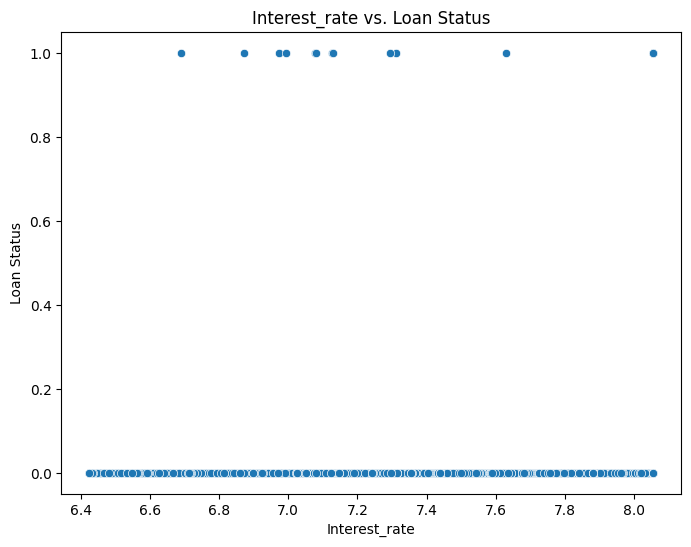

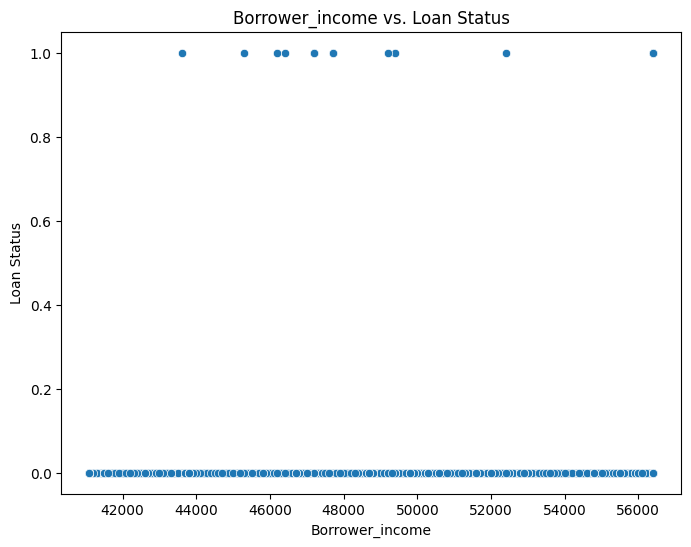

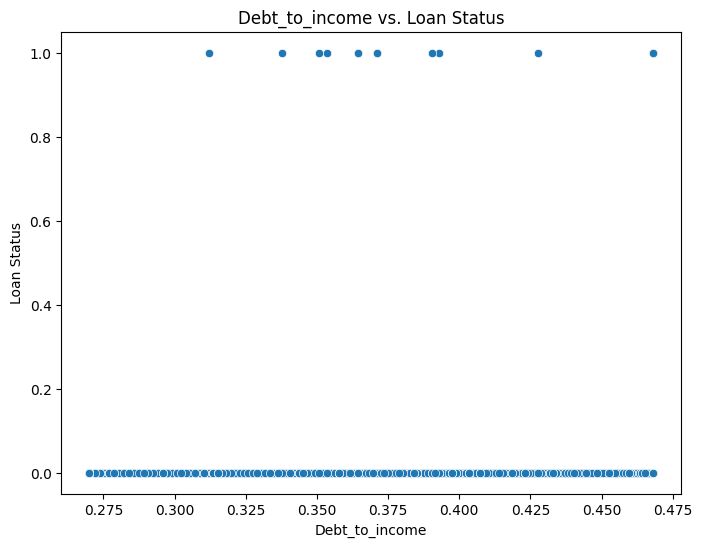

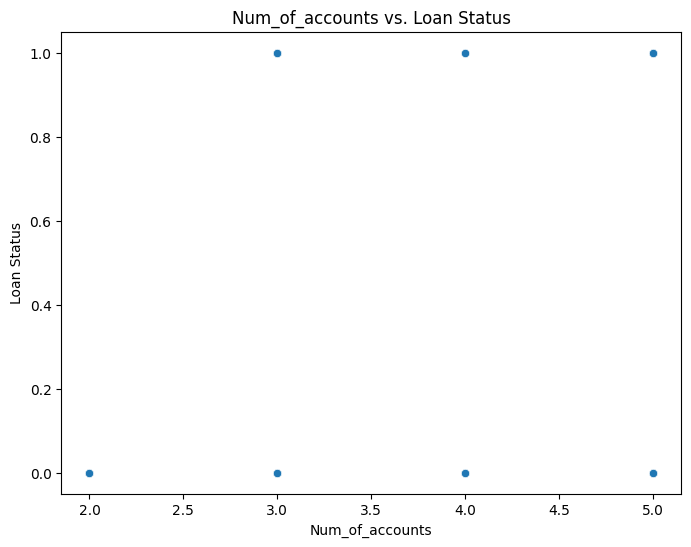

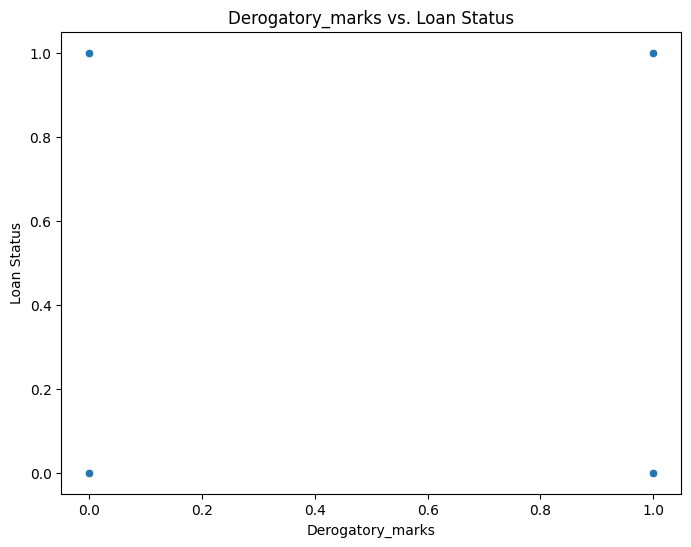

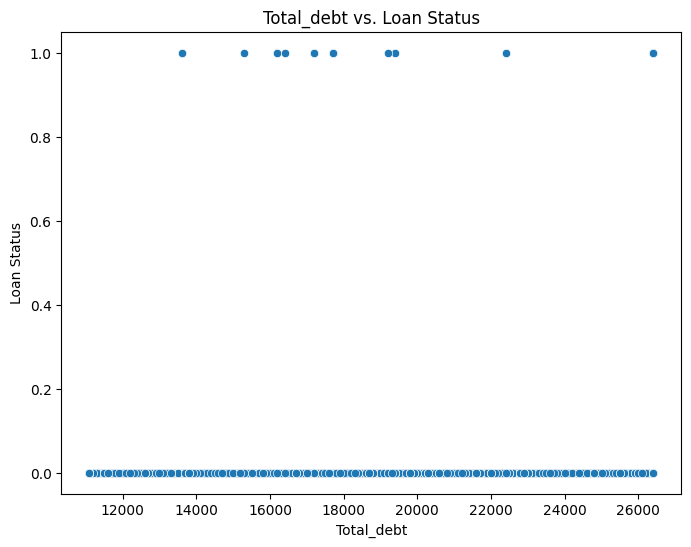

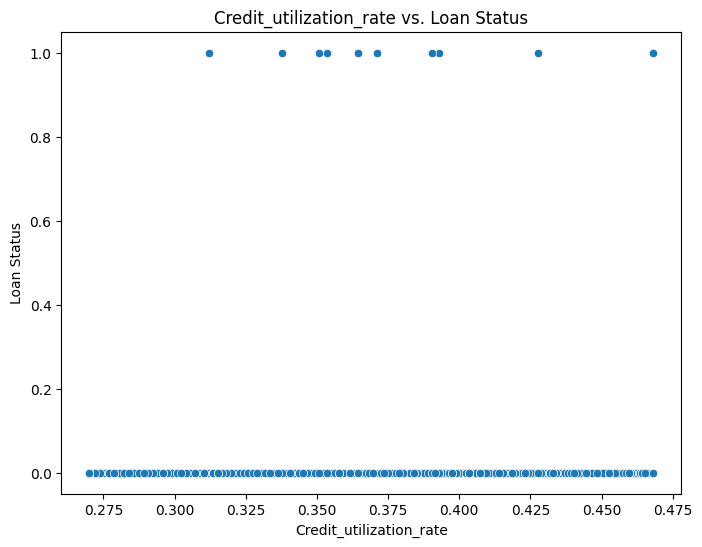

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
                      'num_of_accounts', 'derogatory_marks', 'total_debt','credit_utilization_rate']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='loan_status', data=data)
    plt.title(f'{feature.capitalize()} vs. Loan Status')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Loan Status')
    plt.show()

<ipython-input-18-20a45fb3dc87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


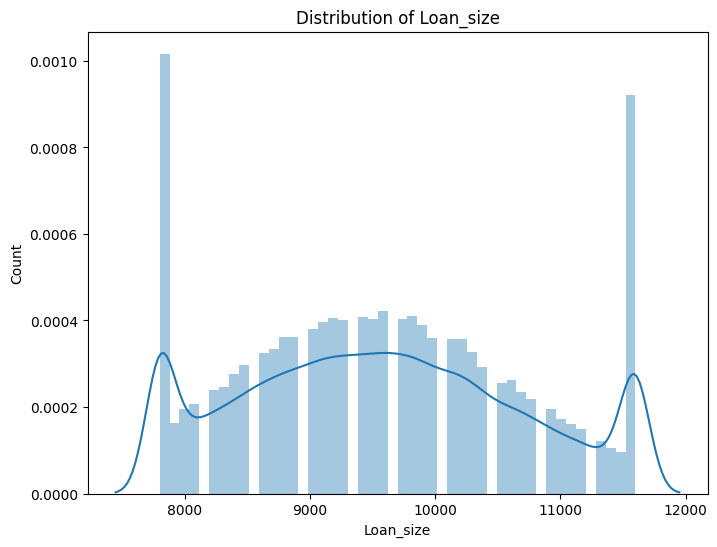

<ipython-input-18-20a45fb3dc87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


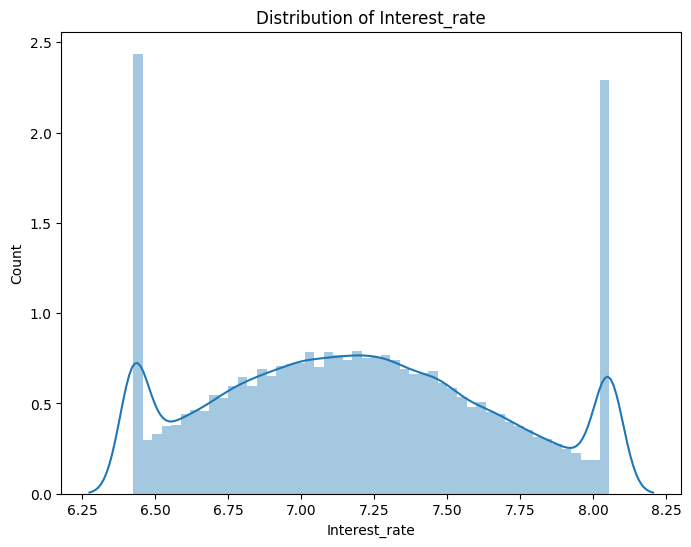

<ipython-input-18-20a45fb3dc87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


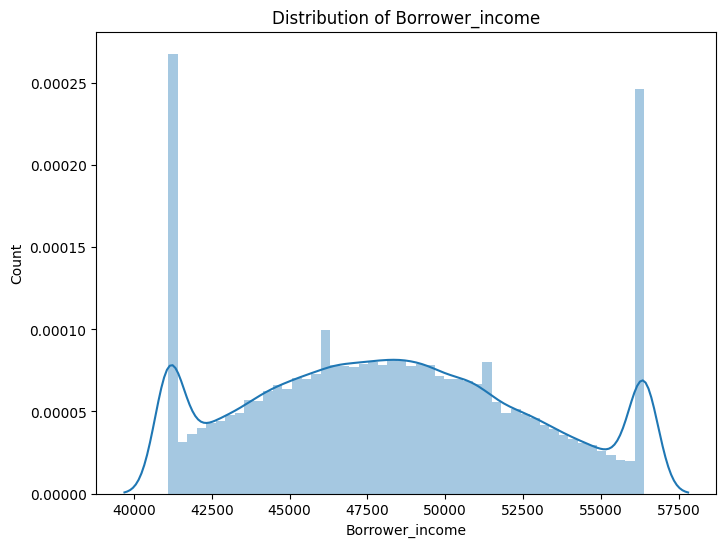

<ipython-input-18-20a45fb3dc87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


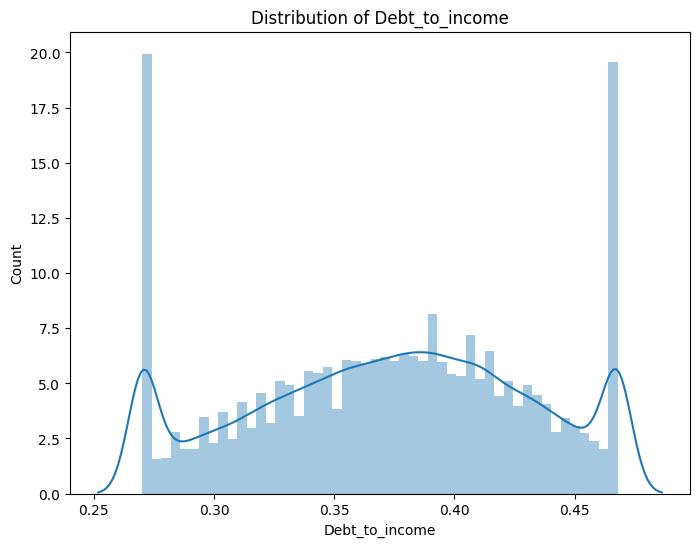

<ipython-input-18-20a45fb3dc87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


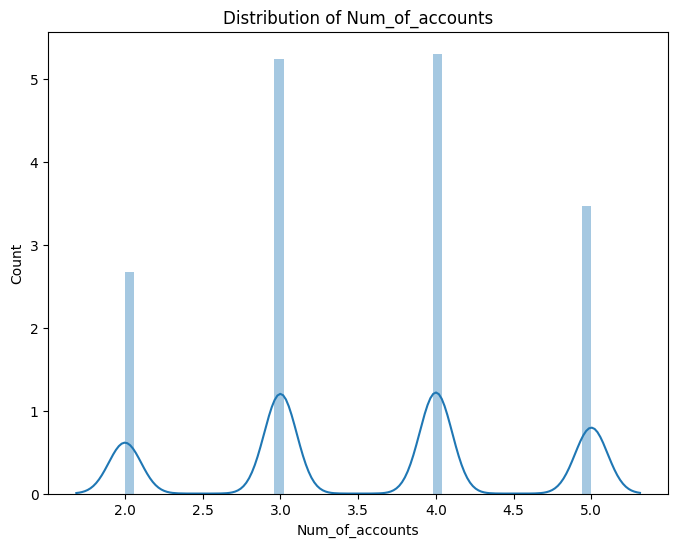

<ipython-input-18-20a45fb3dc87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


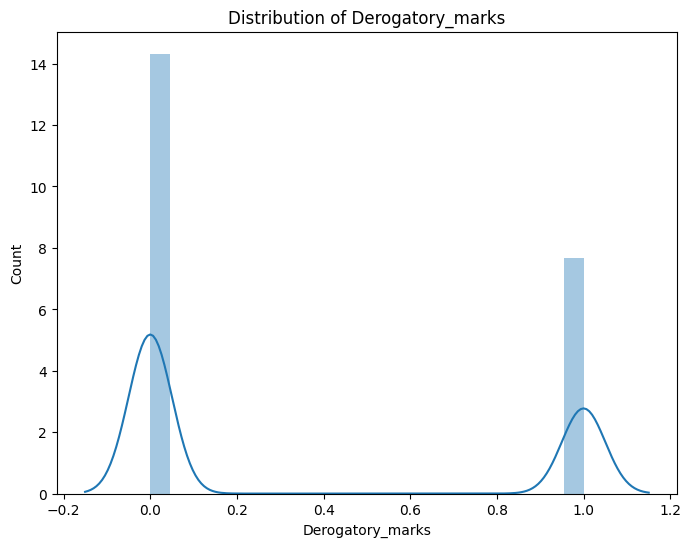

<ipython-input-18-20a45fb3dc87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


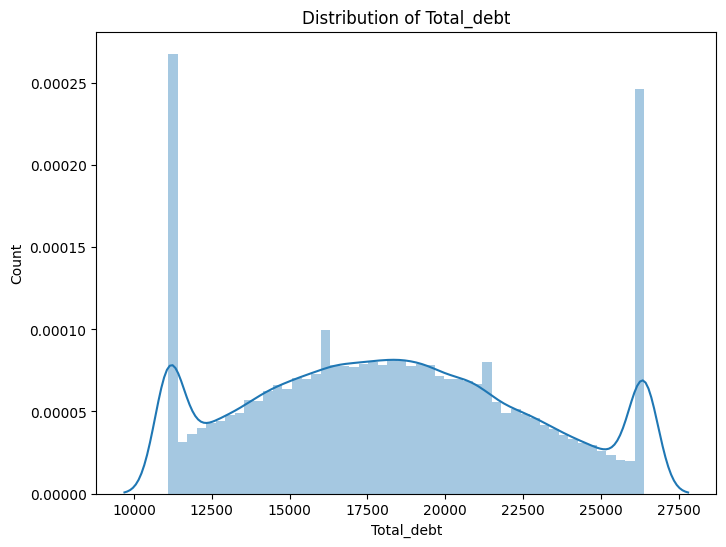

<ipython-input-18-20a45fb3dc87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature])


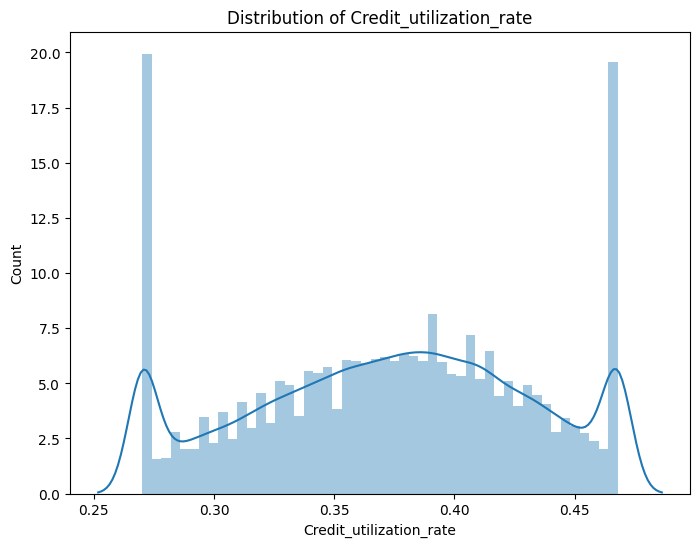

In [18]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.distplot(data[feature])
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.show()

In [19]:

X = data.drop('loan_status', axis=1)
y = data['loan_status']

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (77536, 8)
Shape of y (target): (77536,)


In [20]:
print("\nTarget Variable Distribution:")
print(data['loan_status'].value_counts())


Target Variable Distribution:
loan_status
0    75036
1     2500
Name: count, dtype: int64


# Handling Imbalanced data

In [21]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Sample data (assuming you have your data in 'X' and 'y' variables)
# ... (your data definition)

# Print class distribution before oversampling
print(y.value_counts())

# Apply SMOTE oversampling
oversampler = SMOTE(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Convert X_resampled back to DataFrame (if necessary)
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

# Convert y_resampled to Series with a name (if necessary)
y_resampled = pd.Series(y_resampled, name=y.name)

# Print class distribution after SMOTE oversampling
print(y_resampled.value_counts())

loan_status
0    75036
1     2500
Name: count, dtype: int64
loan_status
0    75036
1    75036
Name: count, dtype: int64


# Correlation Analysis

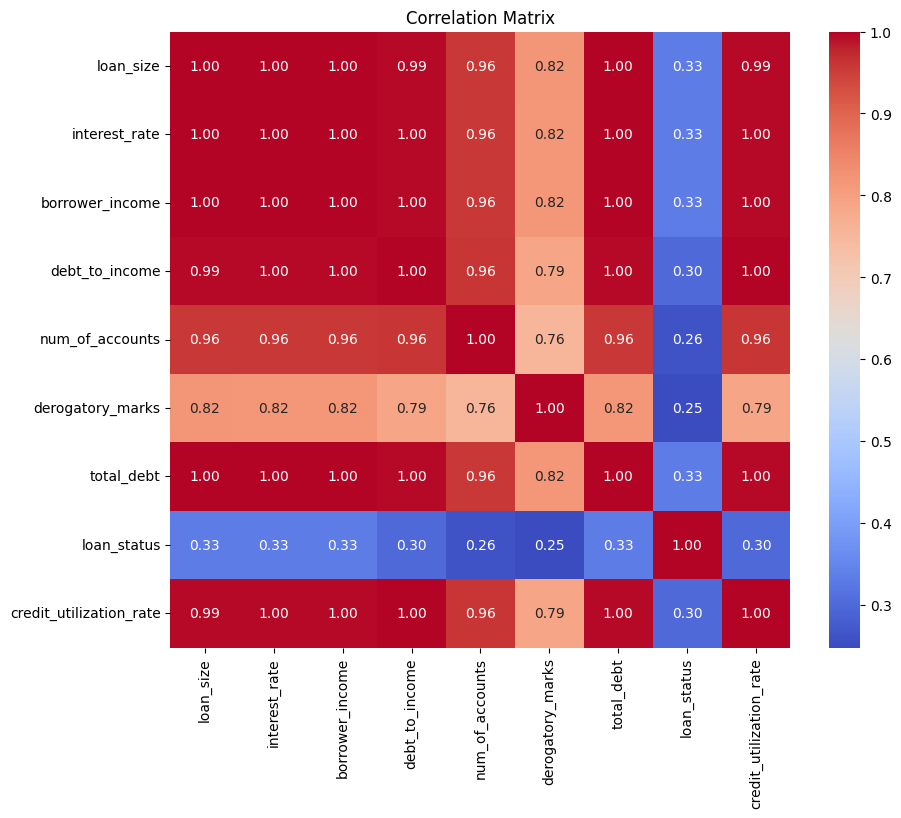

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=54)

In [24]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Model**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

In [26]:
model=[]
name=[]
res=[]

In [27]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print the balanced_accuracy score of the model
testing_accuracy = balanced_accuracy_score(y_test, y_pred)

# View the result
print(f'The balanced accuracy with the original data is {testing_accuracy}')

name.append('RandomForestClassifier')
res.append(testing_accuracy)

[[14451   608]
 [   17 14939]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15059
           1       0.96      1.00      0.98     14956

    accuracy                           0.98     30015
   macro avg       0.98      0.98      0.98     30015
weighted avg       0.98      0.98      0.98     30015

The balanced accuracy with the original data is 0.9792444027904079


ROC AUC: 0.98


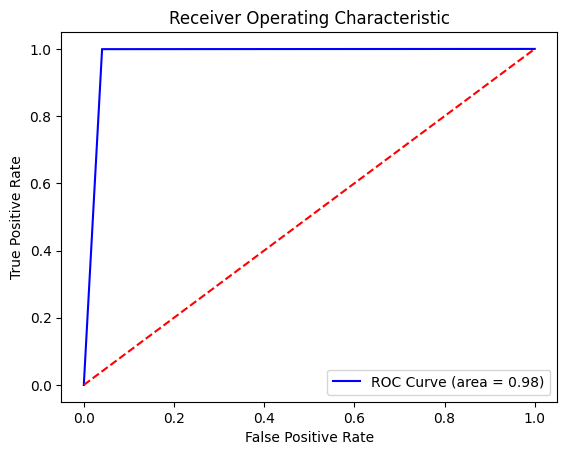

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {roc_auc:.2f}')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=42)

tree.fit(X_train, y_train)

# Predictions
y_pred = tree.predict(X_test)

# Model evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print the balanced_accuracy score of the model
testing_accuracy = balanced_accuracy_score(y_test, y_pred)

# View the result
print(f'The balanced accuracy with the original data is {testing_accuracy}')

name.append(' DecisionTreeClassifier')
res.append(testing_accuracy)

[[14451   608]
 [   58 14898]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15059
           1       0.96      1.00      0.98     14956

    accuracy                           0.98     30015
   macro avg       0.98      0.98      0.98     30015
weighted avg       0.98      0.98      0.98     30015

The balanced accuracy with the original data is 0.9778737154408492


In [30]:
from sklearn.ensemble import GradientBoostingClassifier


gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)


gbm_model.fit(X_train, y_train)

# Predictions
y_pred = gbm_model.predict(X_test)

# Model evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print the balanced_accuracy score of the model
testing_accuracy = balanced_accuracy_score(y_test, y_pred)

# View the result
print(f'The balanced accuracy with the original data is {testing_accuracy}')

name.append('GradientBoostingClassifier')
res.append(testing_accuracy)

[[14451   608]
 [   23 14933]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15059
           1       0.96      1.00      0.98     14956

    accuracy                           0.98     30015
   macro avg       0.98      0.98      0.98     30015
weighted avg       0.98      0.98      0.98     30015

The balanced accuracy with the original data is 0.9790438143977896


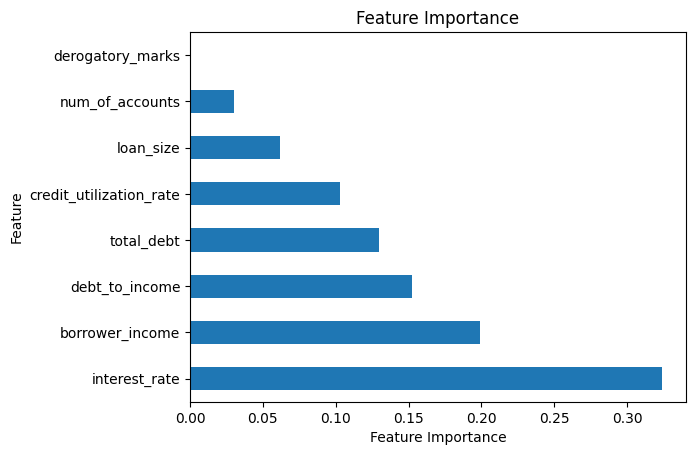

In [31]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names)
feature_importances.sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [32]:
from sklearn.ensemble import AdaBoostClassifier

# Define the model with hyperparameters (optional)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model on the resampled training data
ada_model.fit(X_train, y_train)

# Predictions
y_pred = ada_model.predict(X_test)

# Model evaluation (similar to GBM)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
testing_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'The balanced accuracy with AdaBoost is {testing_accuracy}')

name.append('AdaBoostClassifier')
res.append(testing_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[14451   608]
 [   71 14885]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15059
           1       0.96      1.00      0.98     14956

    accuracy                           0.98     30015
   macro avg       0.98      0.98      0.98     30015
weighted avg       0.98      0.98      0.98     30015

The balanced accuracy with AdaBoost is 0.9774391072568429


In [33]:
from sklearn.linear_model import LogisticRegression

# Define the model with hyperparameters (optional)
logreg_model = LogisticRegression(random_state=42)

# Train the model on the resampled training data
logreg_model.fit(X_train, y_train)

# Predictions
y_pred = logreg_model.predict(X_test)

# Model evaluation (similar to GBM)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
testing_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'The balanced accuracy with Logistic Regression is {testing_accuracy}')

name.append('LogisticRegression')
res.append(testing_accuracy)

[[14307   752]
 [   65 14891]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     15059
           1       0.95      1.00      0.97     14956

    accuracy                           0.97     30015
   macro avg       0.97      0.97      0.97     30015
weighted avg       0.97      0.97      0.97     30015

The balanced accuracy with Logistic Regression is 0.9728585016790781


['RandomForestClassifier', ' DecisionTreeClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier', 'LogisticRegression']
[0.9792444027904079, 0.9778737154408492, 0.9790438143977896, 0.9774391072568429, 0.9728585016790781]


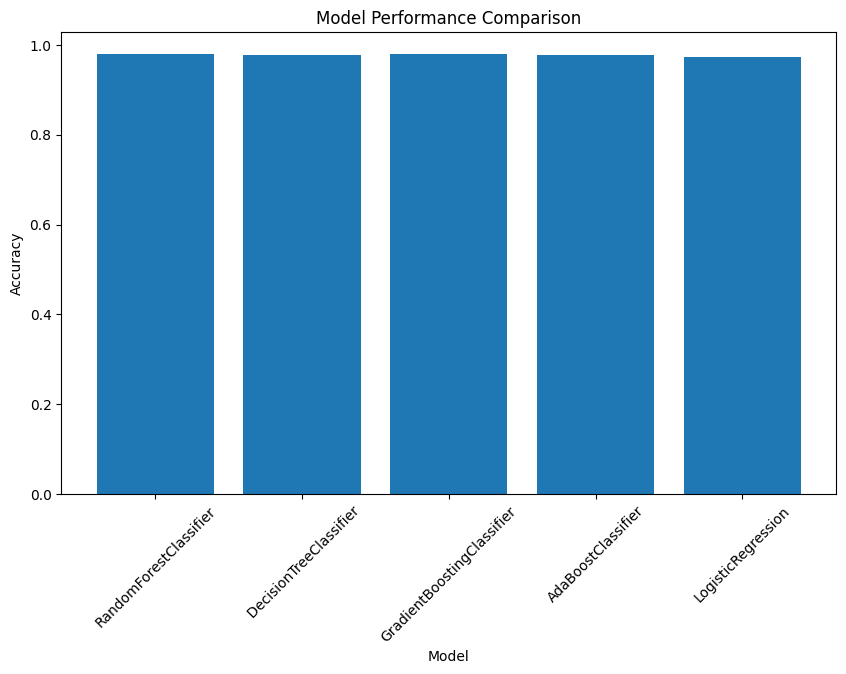

In [34]:
print(name)
print(res)
plt.figure(figsize=(10, 6))
plt.bar(name, res)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()








# Ensembling algorithms

In [35]:
from sklearn.ensemble import StackingClassifier

base_models = [
    ('rf', RandomForestClassifier()),
    ('gbm', GradientBoostingClassifier()),
    ('dt', DecisionTreeClassifier())
]
meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)

# Evaluate the model performance (similar to previous examples)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
testing_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'The balanced accuracy with stacking is {testing_accuracy}')

[[14451   608]
 [   14 14942]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15059
           1       0.96      1.00      0.98     14956

    accuracy                           0.98     30015
   macro avg       0.98      0.98      0.98     30015
weighted avg       0.98      0.98      0.98     30015

The balanced accuracy with stacking is 0.9793446969867172


# Model Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define base models
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gbm', GradientBoostingClassifier(random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42)),
    ('logreg', LogisticRegression(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Define meta-model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)


# Hyperparameter tuning using Grid Search
param_grid = {
    'final_estimator__C': [0.1, 1.0, 10.0],
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 5, 10],
    'gbm__n_estimators': [100, 200],
    'gbm__learning_rate': [0.1, 0.01],
    'ada__n_estimators': [50, 100, 150],
    'dt__max_depth': [None, 5, 10]
}
grid_search = GridSearchCV(stacking_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
testing_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'The balanced accuracy with stacking is {testing_accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1